# Employees analysis

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data

In [2]:
raw_data = pd.read_excel(io='employees.xlsx', sheet_name='Dataset', header=3)
raw_data = raw_data.drop(['Unnamed: 0', 'Unnamed: 11'], axis=1)
raw_data.head()

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Bold,Caroline,63,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0
1,Zamora,Jennifer,38,Female,United States,White,2010-04-10,IT/IS,CIO,135200.0
2,Houlihan,Debra,51,Female,United States,White,2014-05-05,Sales,Director of Sales,124800.0
3,Bramante,Elisa,34,Female,United States,Black or African American,2009-01-05,Production,Director of Operations,124800.0
4,Del Bosque,Keyla,38,Female,United States,Black or African American,2012-01-09,Software Engineering,Software Engineer,118809.6


In [3]:
raw_data.describe()

,Age,Salary
count,174.000000,174.000000
mean,37.793103,68603.779310
std,8.384734,34121.543021
min,25.000000,29120.000000
25%,31.000000,41600.000000
50%,36.000000,52000.000000
75%,43.000000,110240.000000
max,67.000000,166400.000000


In [4]:
raw_data.describe(include='all', datetime_is_numeric=True)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
count,174,174,174.000000,174,174,174,174,174,174,174.000000
unique,169,154,NaN,2,6,5,NaN,7,23,NaN
top,Smith,Lisa,NaN,Female,United States,White,NaN,Production,Production Technician I,NaN
freq,3,3,NaN,98,166,112,NaN,106,73,NaN
mean,NaN,NaN,37.793103,NaN,NaN,NaN,2013-04-15 22:12:24.827586304,NaN,NaN,68603.779310
min,NaN,NaN,25.000000,NaN,NaN,NaN,2006-01-09 00:00:00,NaN,NaN,29120.000000
25%,NaN,NaN,31.000000,NaN,NaN,NaN,2012-02-20 00:00:00,NaN,NaN,41600.000000
50%,NaN,NaN,36.000000,NaN,NaN,NaN,2013-09-30 00:00:00,NaN,NaN,52000.000000
75%,NaN,NaN,43.000000,NaN,NaN,NaN,2014-09-29 00:00:00,NaN,NaN,110240.000000
max,NaN,NaN,67.000000,NaN,NaN,NaN,2016-01-28 00:00:00,NaN,NaN,166400.000000


In [5]:
data = raw_data

## Analising data

### Pay gap by ethnicity

If we set null hypothesis as H0 = mean_salary_by_white - mean_salary_by_others == 0,
and alternative as H1 = mean_salary_by_white - mean_salary_by_others != 0.
We are assuming that there isn't any pay gap discrimination by ethnicity and trying to reject that.

In [6]:
mean_white_salary = np.mean(data['Salary'].where(data['Ethnicity'] == 'White'))
mean_non_white_salary = np.mean(data['Salary'].where(data['Ethnicity'] != 'White'))

variance_white = np.var(data['Salary'].where(data['Ethnicity'] == 'White'), ddof=1)
variance_non_white = np.var(data['Salary'].where(data['Ethnicity'] != 'White'), ddof=1)

number_of_white = data['Salary'].where(data['Ethnicity'] == 'White').count()
number_of_non_white = data['Salary'].where(data['Ethnicity'] != 'White').count()

table_ethnicity = pd.DataFrame(index=['White', 'Non White'], columns=['Mean', 'Variance', 'Count'])

table_ethnicity['Mean'] = mean_white_salary, mean_non_white_salary
table_ethnicity['Variance'] = variance_white, variance_non_white
table_ethnicity['Count'] = number_of_white, number_of_non_white

table_ethnicity

,Mean,Variance,Count
White,67323.100000,1.136728e+09,112
Non White,70917.264516,1.225050e+09,62


In [7]:
pooled_std = ((number_of_white - 1)*variance_white + (number_of_non_white - 1)*variance_non_white)/(number_of_white+number_of_non_white-2)
standard_error = np.sqrt(pooled_std/number_of_white + pooled_std/number_of_non_white)
T_score = (mean_white_salary - mean_non_white_salary)/standard_error

pooled_std, standard_error, T_score

(1168051481.9473374, 5410.04354143515, -0.6643503862032836)

After getting p-value of 0.51 we can accept null hypothesis with absolute certainty.

### Pay Gap by Gender

If we set null hypothesis as H0 = mean_salary_by_males - mean_salary_by_females == 0,
and alternative as H1 = mean_salary_by_males - mean_salary_by_females != 0.
We are assuming that there isn't any pay gap discrimination by gender and trying to reject that.

In [8]:
mean_male_salary = np.mean(data['Salary'].where(data['Gender'] == 'Male'))
mean_female_salary = np.mean(data['Salary'].where(data['Gender'] == 'Female'))

variance_male = np.var(data['Salary'].where(data['Gender'] == 'Male'), ddof=1)
variance_female = np.var(data['Salary'].where(data['Gender'] == 'Female'), ddof=1)

number_of_male = data['Salary'].where(data['Gender'] == 'Male').count()
number_of_female = data['Salary'].where(data['Gender'] == 'Female').count()

table_gender = pd.DataFrame(index=['Male', 'Female'], columns=['Mean', 'Variance', 'Count'])
table_gender['Mean'] = mean_male_salary, mean_female_salary
table_gender['Variance'] = [variance_male, variance_female]
table_gender['Count'] = number_of_male, number_of_female

table_gender

,Mean,Variance,Count
Male,72300.526316,1.241432e+09,76
Female,65736.914286,1.097618e+09,98


In [9]:
pooled_var_gender = ((number_of_male - 1)*variance_male + (number_of_female - 1)*variance_female)/(number_of_male+number_of_female-2)
standard_error_gerder = np.sqrt(pooled_var_gender/number_of_male+pooled_var_gender/number_of_female)
T_score = (mean_male_salary - mean_female_salary)/standard_error_gerder

T_score, pooled_var_gender

(1.2606595770038982, 1160327458.0059724)

With p-score of 0.209 we can saffely accept null hypothesis and conclude that there isn't gender based pay gap.

### Distributions

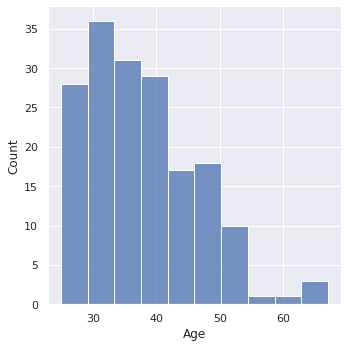

In [10]:
sns.displot(data['Age'])

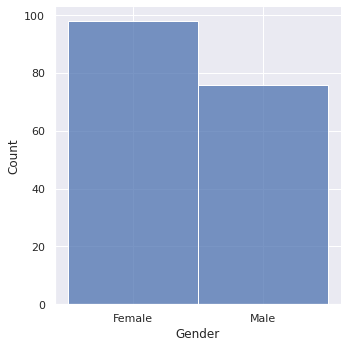

In [11]:
sns.displot(data['Gender'])

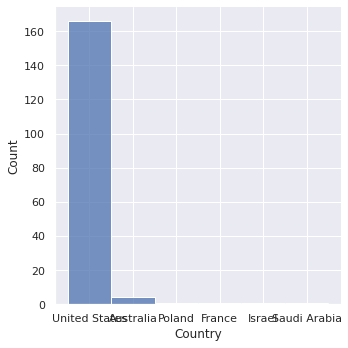

In [12]:
sns.displot(data['Country'])

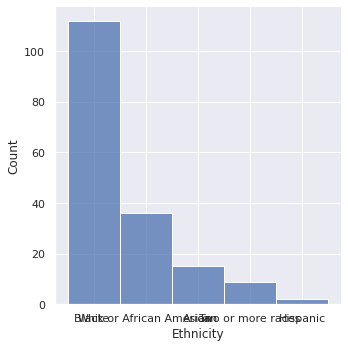

In [13]:
sns.displot(data['Ethnicity'])

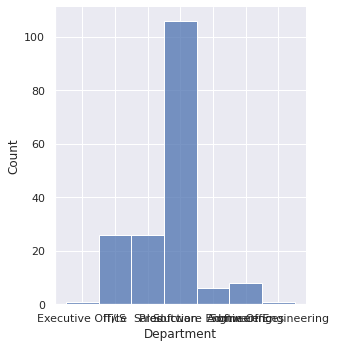

In [14]:
sns.displot(data['Department'])

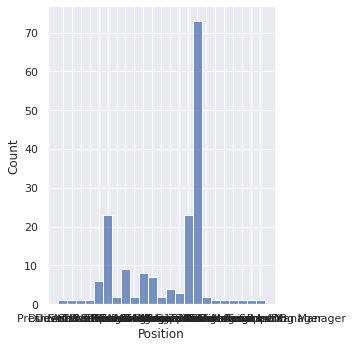

In [15]:
sns.displot(data['Position'])

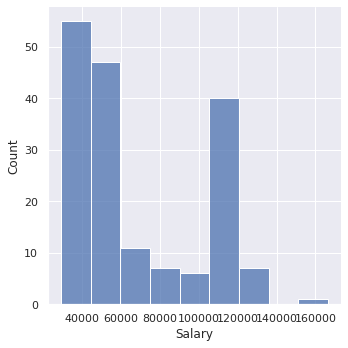

In [16]:
sns.displot(data['Salary'])

## Scater Plots

<AxesSubplot:xlabel='Age', ylabel='Salary'>

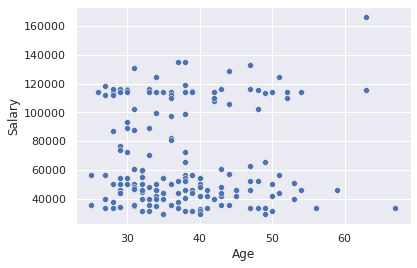

In [47]:
sns.scatterplot(x=data['Age'], y=data['Salary'])

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

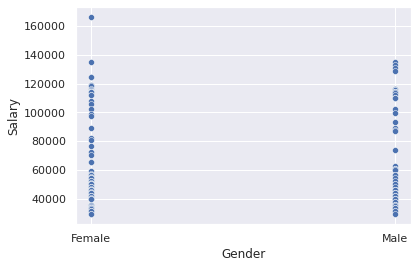

In [48]:
sns.scatterplot(x=data['Gender'], y=data['Salary'])

<AxesSubplot:xlabel='Country', ylabel='Salary'>

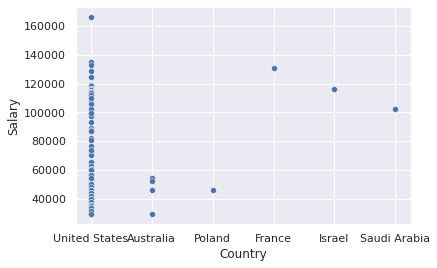

In [49]:
sns.scatterplot(x=data['Country'], y=data['Salary'])

<AxesSubplot:xlabel='Ethnicity', ylabel='Salary'>

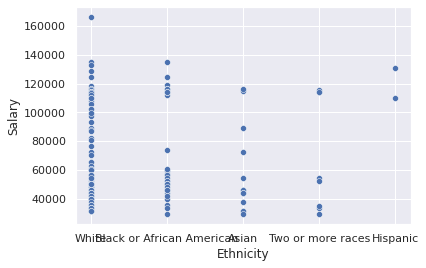

In [50]:
sns.scatterplot(x=data['Ethnicity'], y=data['Salary'])

<AxesSubplot:xlabel='Department', ylabel='Salary'>

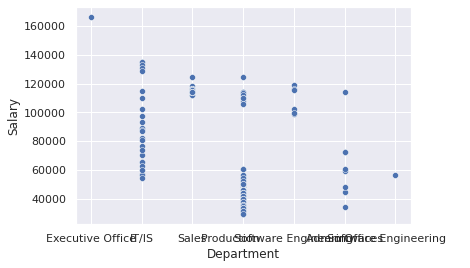

In [51]:
sns.scatterplot(x=data['Department'], y=data['Salary'])

<AxesSubplot:xlabel='Position', ylabel='Salary'>

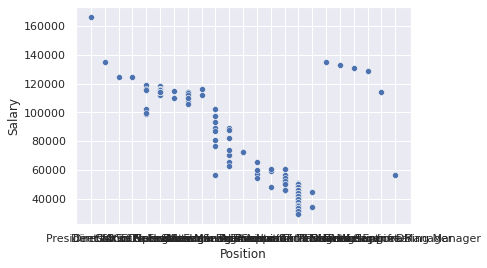

In [52]:
sns.scatterplot(x=data['Position'], y=data['Salary'])

## Data Transformation

In [30]:
data.columns

Index(['Surname', 'Name', 'Age', 'Gender', 'Country', 'Ethnicity',
       'Start_date', 'Department', 'Position', 'Salary'],
      dtype='object')

In [53]:
desired_features = ['Position', 'Salary']
data_selected = data[desired_features]
data_selected

,Position,Salary
0,President & CEO,166400.0
1,CIO,135200.0
2,Director of Sales,124800.0
3,Director of Operations,124800.0
4,Software Engineer,118809.6
...,...,...
169,Production Technician I,33280.0
170,Production Technician I,33280.0
171,Production Technician I,31200.0
172,Production Technician I,31200.0


In [54]:
data_dummyes = pd.get_dummies(data_selected)
data_dummyes.head()

,Salary,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_CIO,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_IT Director,Position_IT Manager - DB,...,Position_President & CEO,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. Network Engineer
0,166400.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,135200.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,124800.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,124800.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,118809.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Train and test model

In [55]:
y = data_dummyes['Salary']
X = data_dummyes.drop(['Salary'], axis=1)

In [56]:
X.head()

,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_CIO,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,...,Position_President & CEO,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. Network Engineer
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
y.head()

0    166400.0
1    135200.0
2    124800.0
3    124800.0
4    118809.6
Name: Salary, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

salary_model = RandomForestRegressor(random_state=1)
salary_model.fit(train_X, train_y)
prediction = salary_model.predict(test_X)

mean_absolute_error(test_y, prediction), np.sqrt(mean_squared_error(test_y, prediction))

(6534.259243043896, 10512.789097562361)

In [37]:
np.mean(data['Salary'])/mean_absolute_error(test_y, prediction)

10.499090525582925